In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Directory containing the CSV files
input_dir = 'Data/new_data'

# List of CSV files
csv_files = [
    'Connecticut_properties.csv',
    'Maine_properties.csv',
    'Massachusetts_properties.csv',
    'New Hampshire_properties.csv',
    'New Jersey_properties.csv',
    'New York_properties.csv',
    'Pennsylvania_properties.csv',
    'Puerto Rico_properties.csv',
    'Rhode Island_properties.csv',
    'Vermont_properties.csv'
]

# Function to load CSV data into a DataFrame and concatenate
def load_and_concat_csv(files):
    dfs = []
    for file in files:
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


# Load and concatenate all CSV data into a single DataFrame
combined_df = load_and_concat_csv(csv_files)

In [3]:
combined_df.head()

ID  bed  bath  acre_lot          city        state  zip_code   
0  Conne1  3.0   1.0      3.93    Willington  Connecticut    6279.0  \
1  Conne2  4.0   3.0      2.34      Coventry  Connecticut    6238.0   
2  Conne3  1.0   1.0     33.20    Willington  Connecticut    6279.0   
3  Conne4  2.0   1.0      0.91  East Windsor  Connecticut    6016.0   
4  Conne5  2.0   1.0      0.36        Vernon  Connecticut    6066.0   

   house_size     price  sold_previously  latitude  longitude  
0      1572.0  225000.0                0  41.88959  -72.25933  
1      3320.0  579900.0                1  41.78281  -72.33941  
2       680.0   65000.0                1  41.88959  -72.25933  
3       960.0  215000.0                1  41.90417  -72.54438  
4       860.0  144900.0                1  41.83641  -72.46063

In [4]:
# Get unique states from the dataset
unique_states = combined_df['state'].unique()
unique_states

array(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
       'New Jersey', 'New York', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'Vermont'], dtype=object)

In [5]:
combined_df['state'].value_counts()

state
New Jersey       231796
New York         197046
Massachusetts    174930
Connecticut       89752
New Hampshire     51358
Vermont           45936
Maine             36647
Rhode Island      29596
Puerto Rico       24104
Pennsylvania      17145
Name: count, dtype: int64

In [6]:
combined_df.isnull().sum()

ID                 0
bed                0
bath               0
acre_lot           0
city               0
state              0
zip_code           0
house_size         0
price              0
sold_previously    0
latitude           0
longitude          0
dtype: int64

In [7]:
combined_df.describe()

bed           bath       acre_lot       zip_code   
count  898310.000000  898310.000000  898310.000000  898310.000000  \
mean        3.001870       2.300198      16.027909    6503.257881   
std         2.080154       1.873194     818.661147    3731.671578   
min         1.000000       1.000000   -1177.800000     601.000000   
25%         2.000000       1.000000       0.150000    2910.000000   
50%         3.000000       2.000000       0.780000    6824.000000   
75%         4.000000       3.000000      10.250000    8852.000000   
max       123.000000     198.000000  100000.000000   95652.000000   

         house_size         price  sold_previously       latitude   
count  8.983100e+05  8.983100e+05    898310.000000  898310.000000  \
mean   2.019219e+03  8.798417e+05         0.494555      40.945997   
std    2.658640e+03  2.463668e+06         0.499971       3.957381   
min   -2.500000e+01  0.000000e+00         0.000000      17.966670   
25%    1.020000e+03  2.690000e+05         0.000000      40.713870   
50%    1.550000e+03  4.750000e+05         0.000000      40.982190   
75%    2.440000e+03  8.380000e+05         1.000000      42.338060   
max    1.450112e+06  8.750000e+08         1.000000      47.330540   

           longitude  
count  898310.000000  
mean      -72.811199  
std         1.825519  
min      -121.400790  
25%       -74.054290  
50%       -73.374710  
75%       -71.515660  
max       -65.286180

In [8]:
#file_path = 'Data/new_data/combined.csv'
#combined_df.to_csv(file_path, index=False)

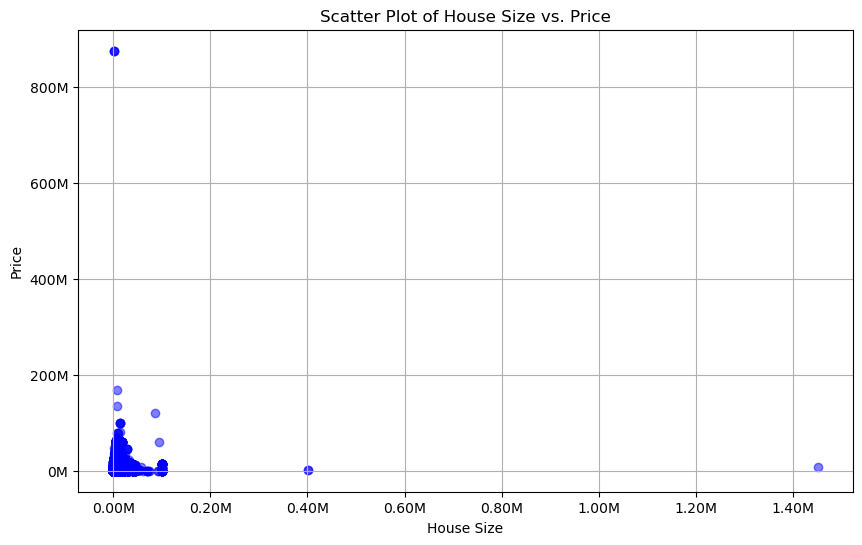

In [9]:
# Scatter plot of house size vs. price
plt.figure(figsize=(10, 6))

# Convert x-axis and y-axis values to millions
x_values_millions = combined_df['house_size'] / 1e6
y_values_millions = combined_df['price'] / 1e6

plt.scatter(x_values_millions, y_values_millions, color='b', alpha=0.5)
plt.title('Scatter Plot of House Size vs. Price')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.grid(True)

# Format x-axis labels in millions with 2 decimal points
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.2f}M'.format(x)))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.0f}M'.format(y)))

plt.show()

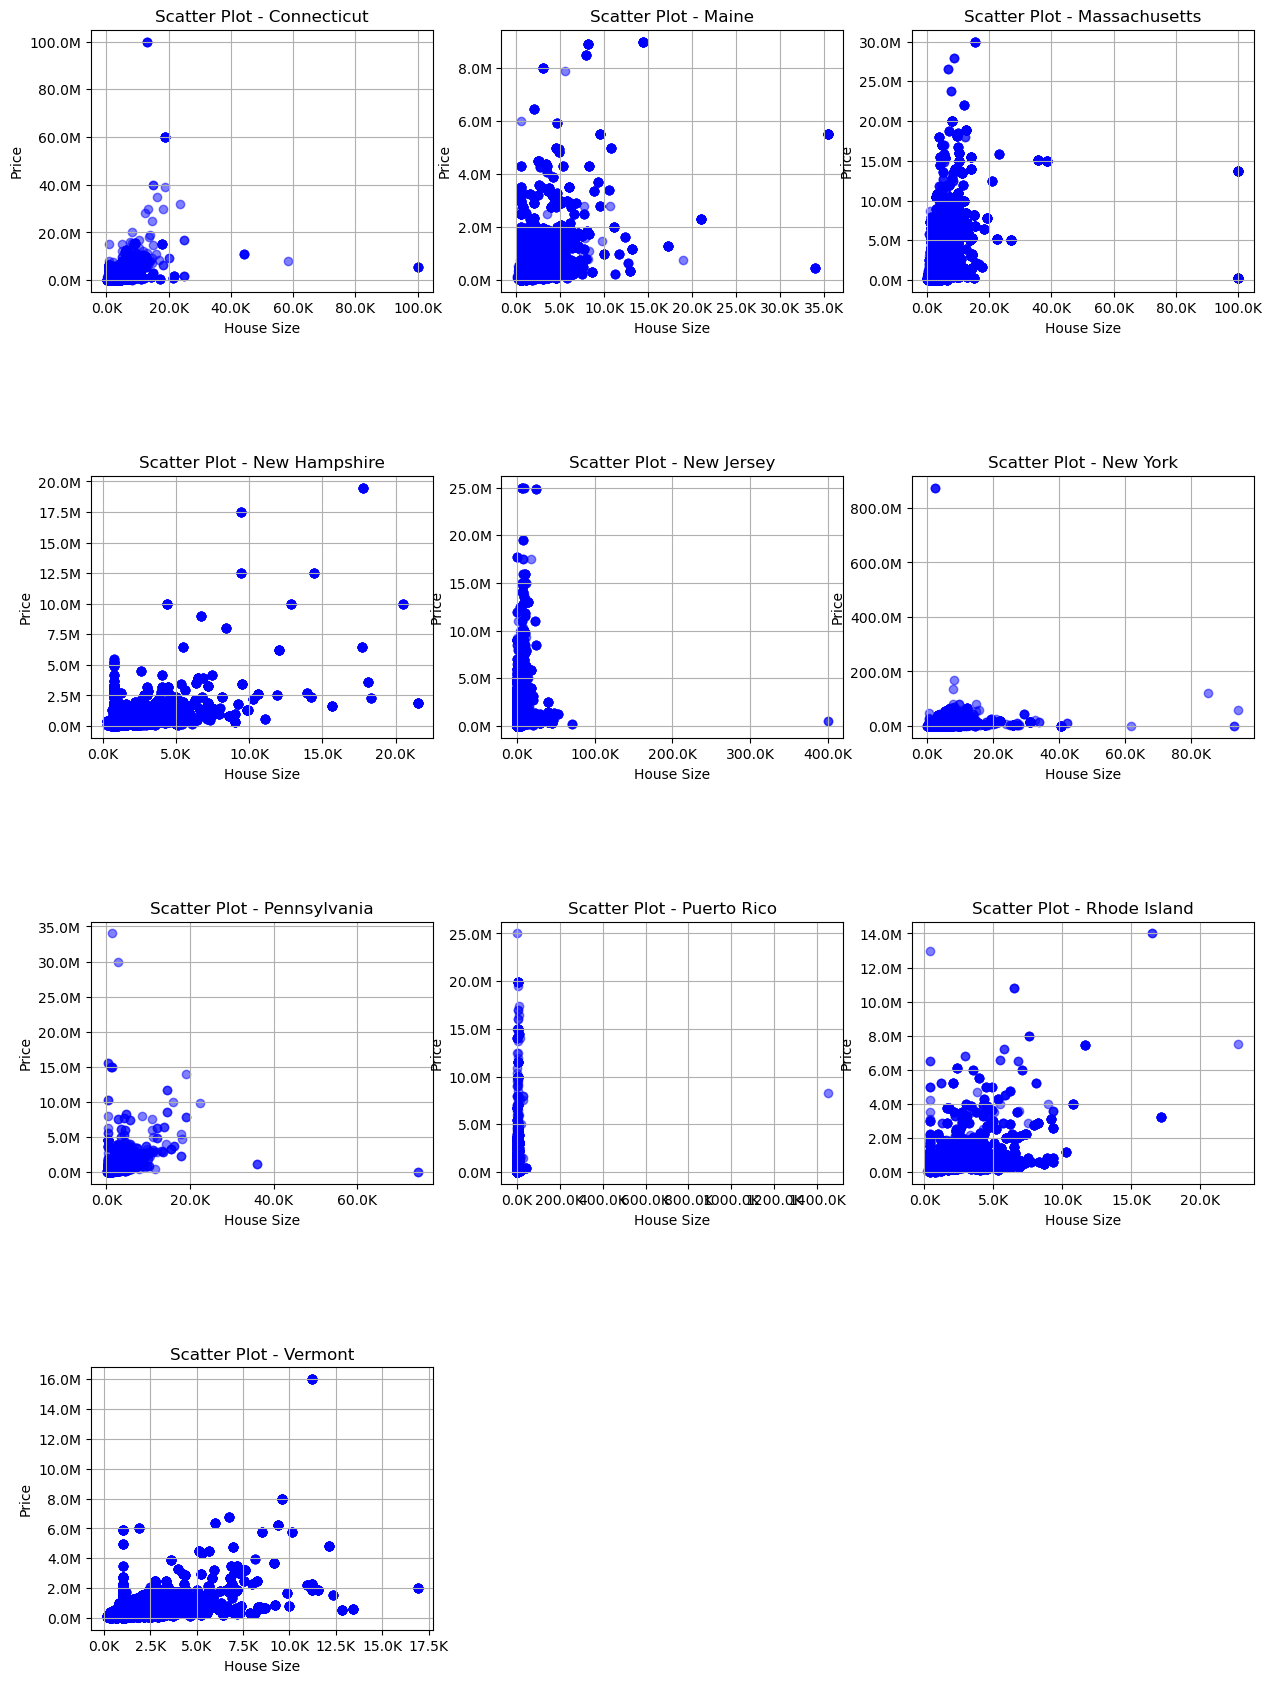

In [10]:
# Calculate the number of rows and columns for the grid layout
num_states = len(unique_states)
num_cols = 3  # Number of scatter plots per row
num_rows = (num_states + num_cols - 1) // num_cols

# Create a grid of scatter plots for each state with adjusted layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    # Convert house size and price to thousands and millions respectively with 1 decimal point
    x_values_thousands = state_df['house_size'] / 1e3
    y_values_millions = state_df['price'] / 1e6
    axes[row, col].scatter(x_values_thousands, y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('House Size')
    axes[row, col].set_ylabel('Price')
    # Format x-axis labels in thousands with 1 decimal place
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.1f}K'.format(x)))
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

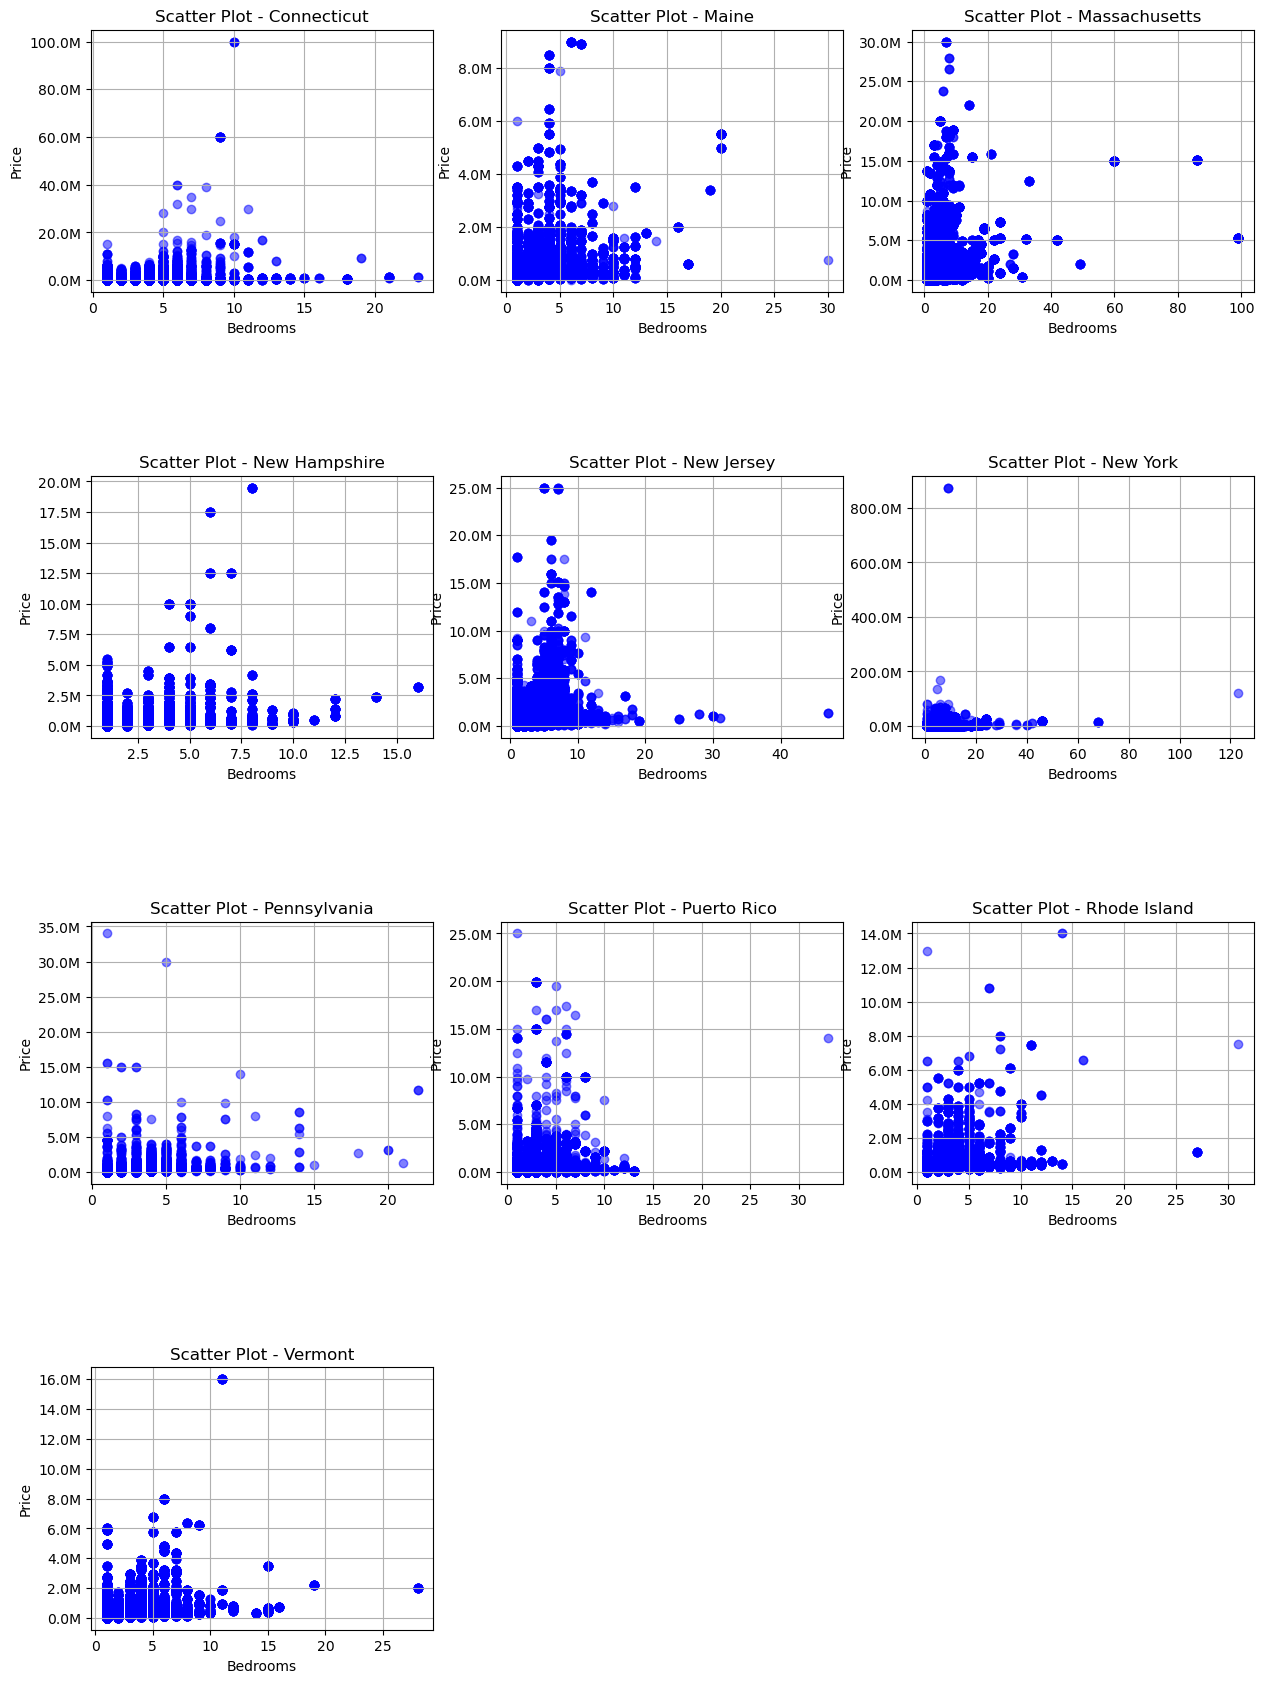

In [11]:
# Create a grid of scatter plots for 'bed' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'bed' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    # Convert price to millions with 1 decimal point
    y_values_millions = state_df['price'] / 1e6
    
    axes[row, col].scatter(state_df['bed'], y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Bedrooms')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

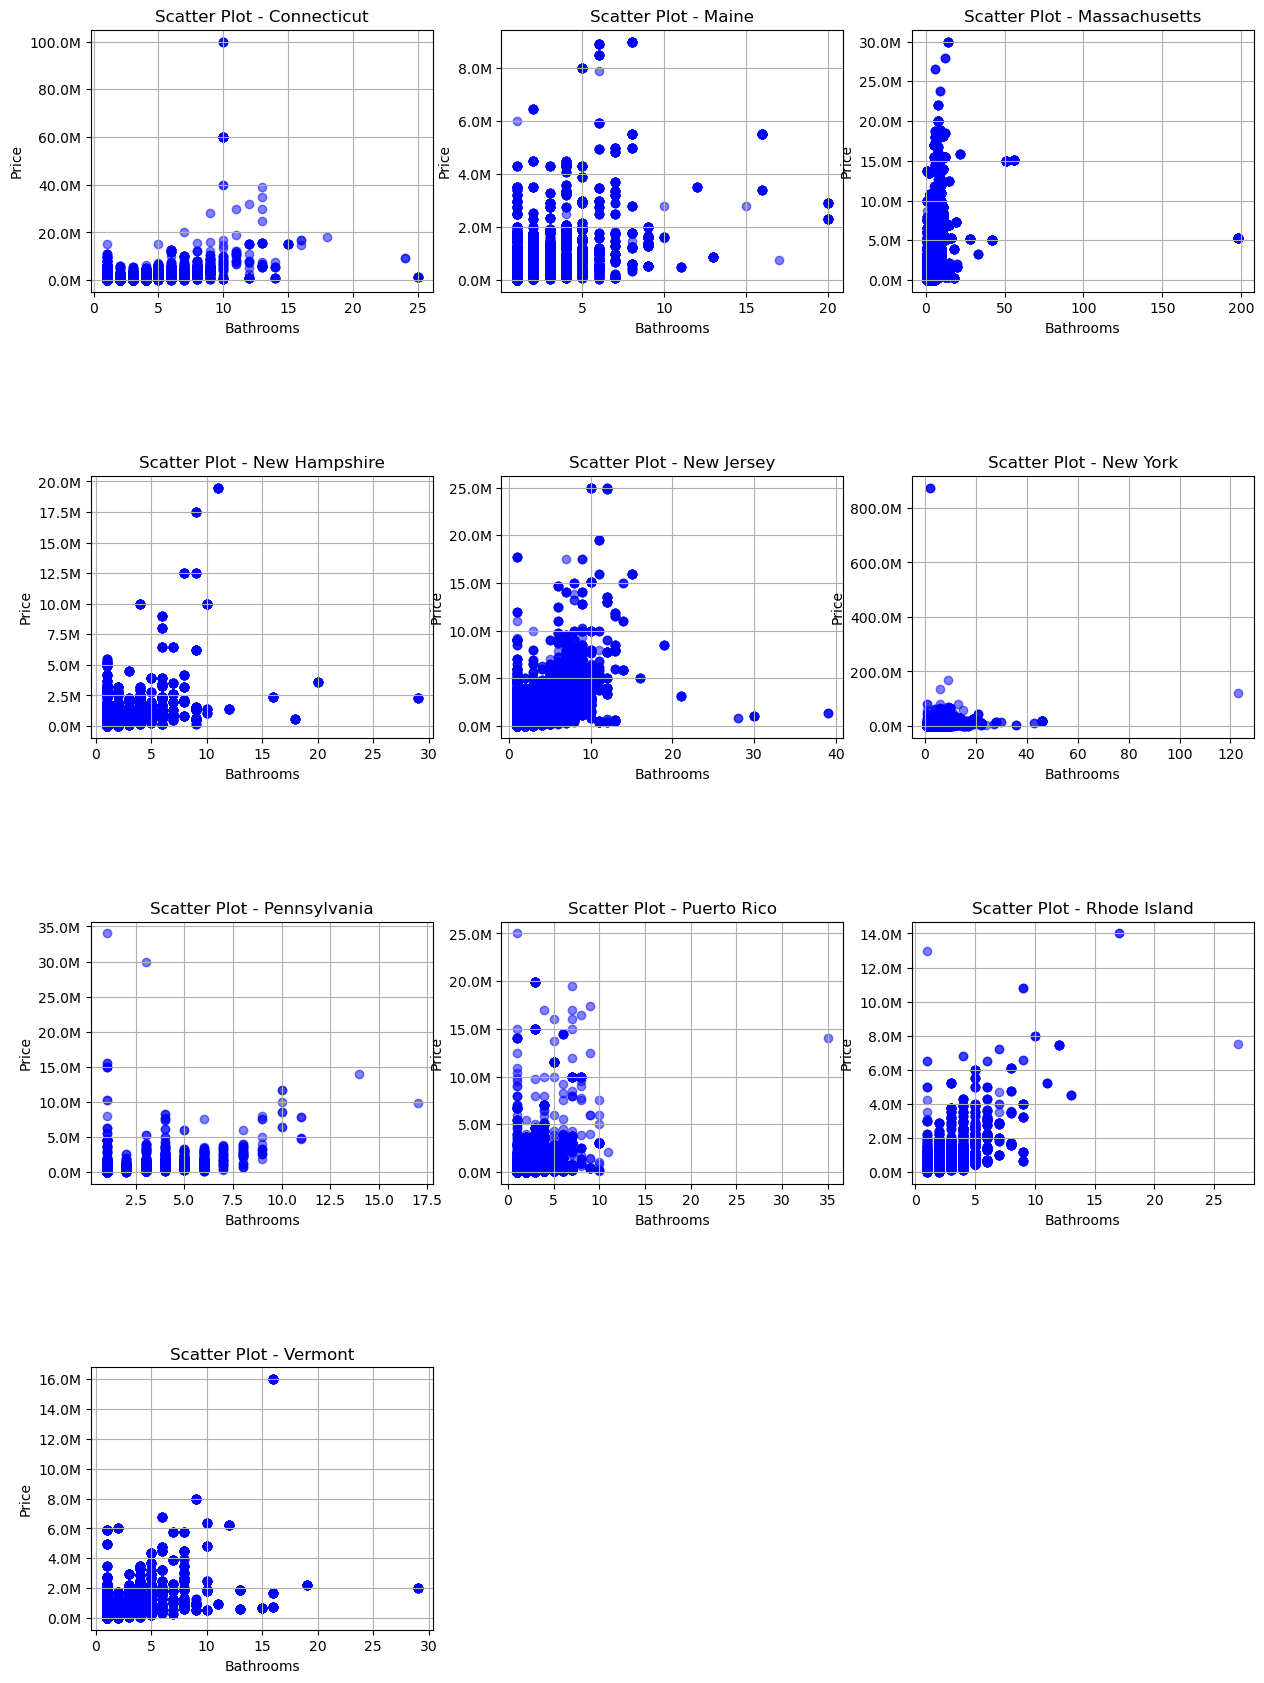

In [12]:
# Create a grid of scatter plots for 'bath' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'bath' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    # Convert price to millions with 1 decimal point
    y_values_millions = state_df['price'] / 1e6
    
    axes[row, col].scatter(state_df['bath'], y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Bathrooms')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

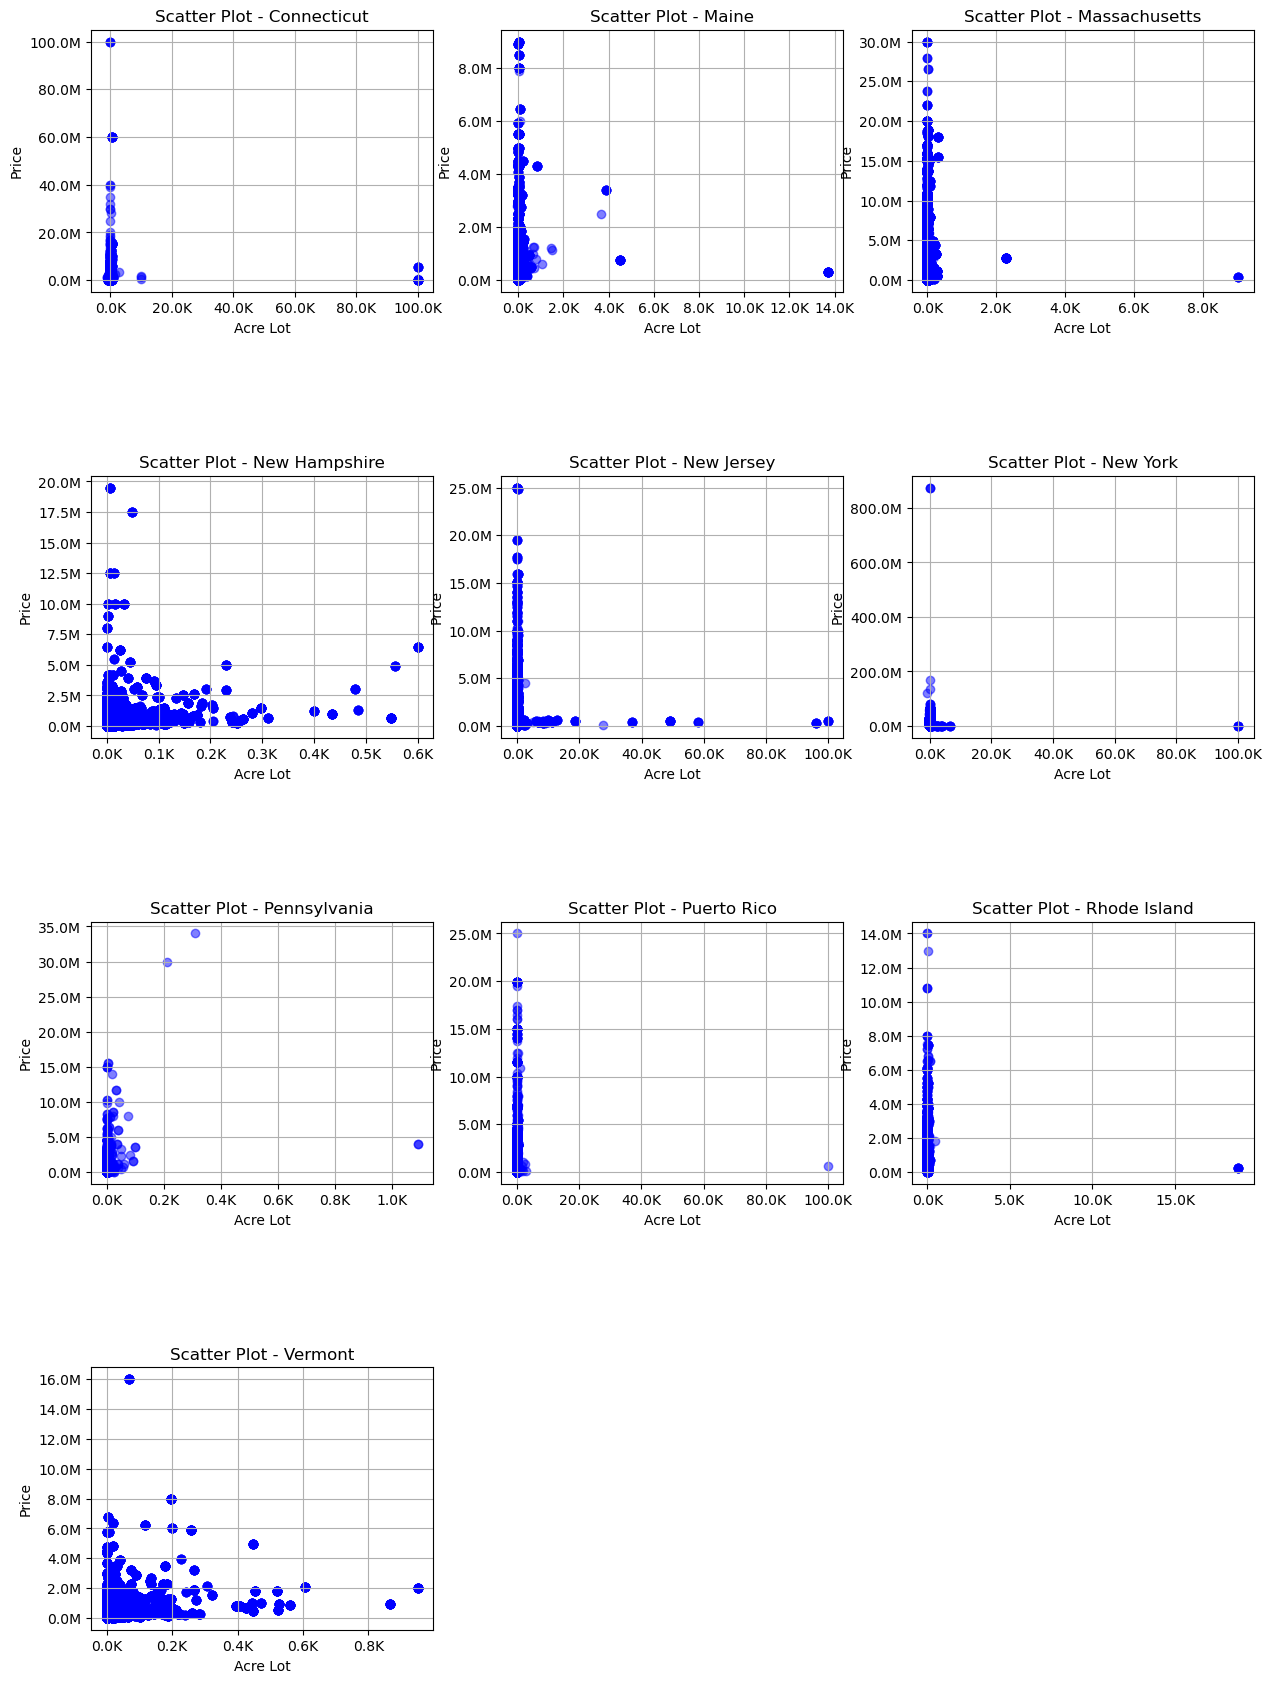

In [13]:
# Create a grid of scatter plots for 'acre_lot' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'acre_lot' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    # Convert 'acre_lot' to thousands with 1 decimal point and 'price' to millions with 1 decimal point
    x_values_thousands = state_df['acre_lot'] / 1e3
    y_values_millions = state_df['price'] / 1e6
    
    axes[row, col].scatter(x_values_thousands, y_values_millions, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Acre Lot')
    axes[row, col].set_ylabel('Price')
    
    # Format x-axis labels in thousands with 1 decimal place
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.1f}K'.format(x)))
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(num_states, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

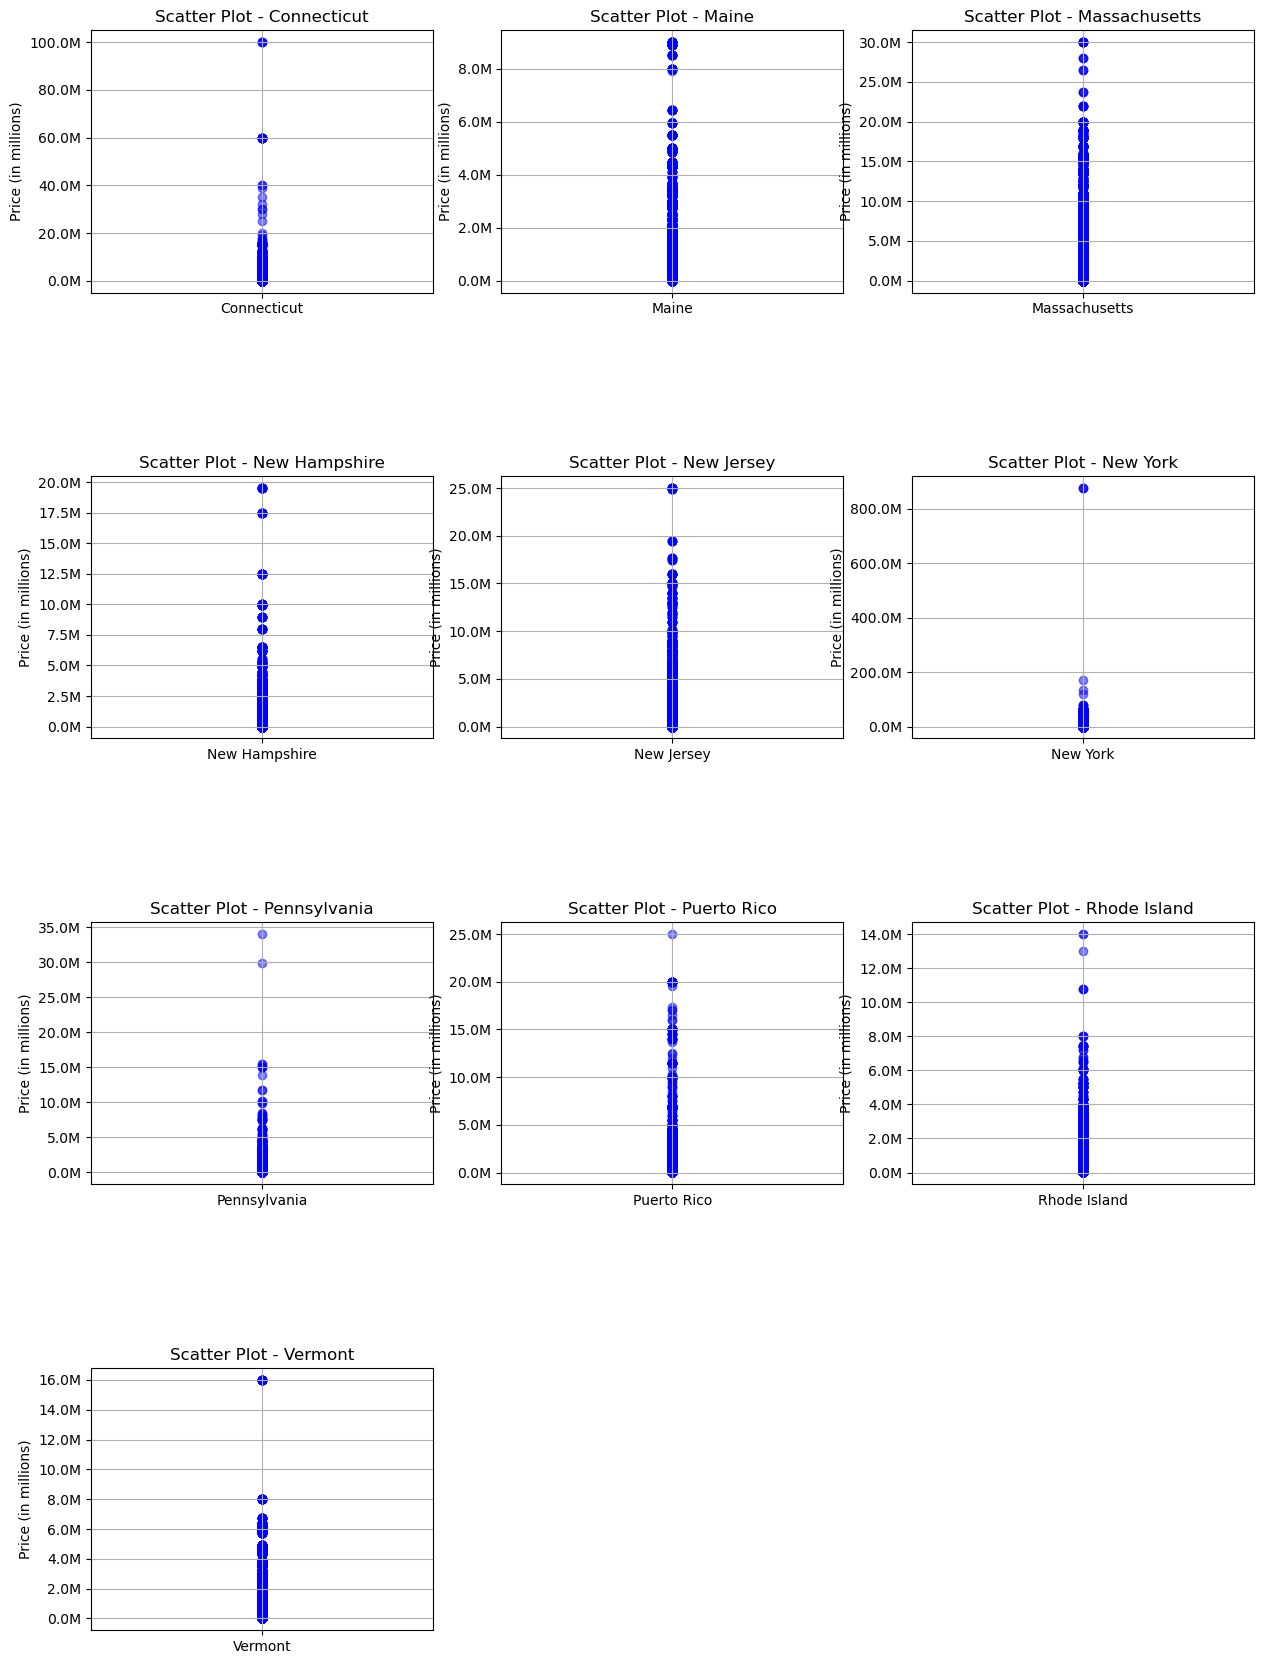

In [14]:
# Create a grid of scatter plots for 'state' vs. 'price'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'state' vs. 'price' and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = combined_df[combined_df['state'] == state]
    
    axes[row, col].scatter(state_df['state'], state_df['price'] / 1e6, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')

    axes[row, col].set_ylabel('Price (in millions)')
    
    # Rotate x-axis labels for better visibility
    axes[row, col].tick_params(axis='x', rotation=0)  # Set rotation to 0 for horizontal labels
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(len(unique_states), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

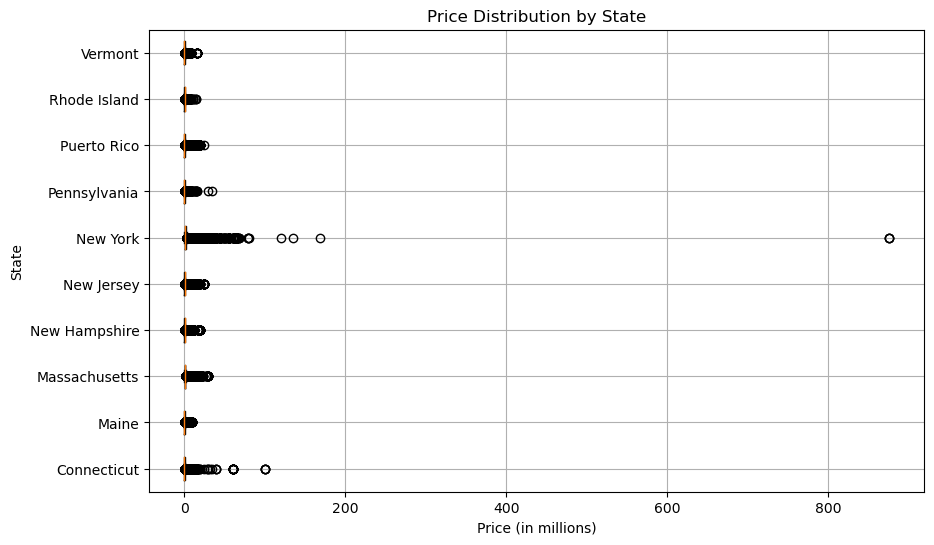

In [15]:
# Create a box plot for all states in a single graph
plt.figure(figsize=(10, 6))

# Data for box plots
data = [combined_df[combined_df['state'] == state]['price'] / 1e6 for state in unique_states]

# Create the box plot
plt.boxplot(data, vert=False, labels=unique_states)

plt.title('Price Distribution by State')
plt.xlabel('Price (in millions)')
plt.ylabel('State')
plt.grid(True)
plt.show()

In [16]:
#remove outliers from specific columns

# Calculate the IQR for each column
Q1 = combined_df[['price', 'bed', 'house_size', 'acre_lot', 'bath']].quantile(0.25)
Q3 = combined_df[['price', 'bed', 'house_size', 'acre_lot', 'bath']].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = combined_df[
    (combined_df['price'] <= upper_bound['price']) &
    (combined_df['bed'] <= upper_bound['bed']) &
    (combined_df['house_size'] <= upper_bound['house_size']) &
    (combined_df['acre_lot'] <= upper_bound['acre_lot']) &
    (combined_df['bath'] <= upper_bound['bath'])
]

In [17]:
filtered_df.describe()

bed           bath       acre_lot       zip_code   
count  706121.000000  706121.000000  706121.000000  706121.000000  \
mean        2.733336       1.995310       2.522416    6363.251873   
std         1.370532       0.987484      28.305350    3868.426697   
min         1.000000       1.000000   -1177.800000     601.000000   
25%         2.000000       1.000000       0.140000    2878.000000   
50%         3.000000       2.000000       0.510000    6374.000000   
75%         4.000000       3.000000       4.900000    8816.000000   
max         7.000000       6.000000      25.400000   95652.000000   

          house_size         price  sold_previously       latitude   
count  706121.000000  7.061210e+05    706121.000000  706121.000000  \
mean     1660.828910  5.006300e+05         0.514599      40.926483   
std       912.302258  3.499385e+05         0.499787       4.214265   
min       -25.000000  0.000000e+00         0.000000      17.966670   
25%       960.000000  2.450000e+05         0.000000      40.704270   
50%      1449.000000  4.200000e+05         1.000000      41.427440   
75%      2174.000000  6.850000e+05         1.000000      42.355630   
max      4570.000000  1.691400e+06         1.000000      47.330540   

           longitude  
count  706121.000000  
mean      -72.702478  
std         1.878630  
min      -121.400790  
25%       -74.032430  
50%       -73.023890  
75%       -71.450780  
max       -65.286180

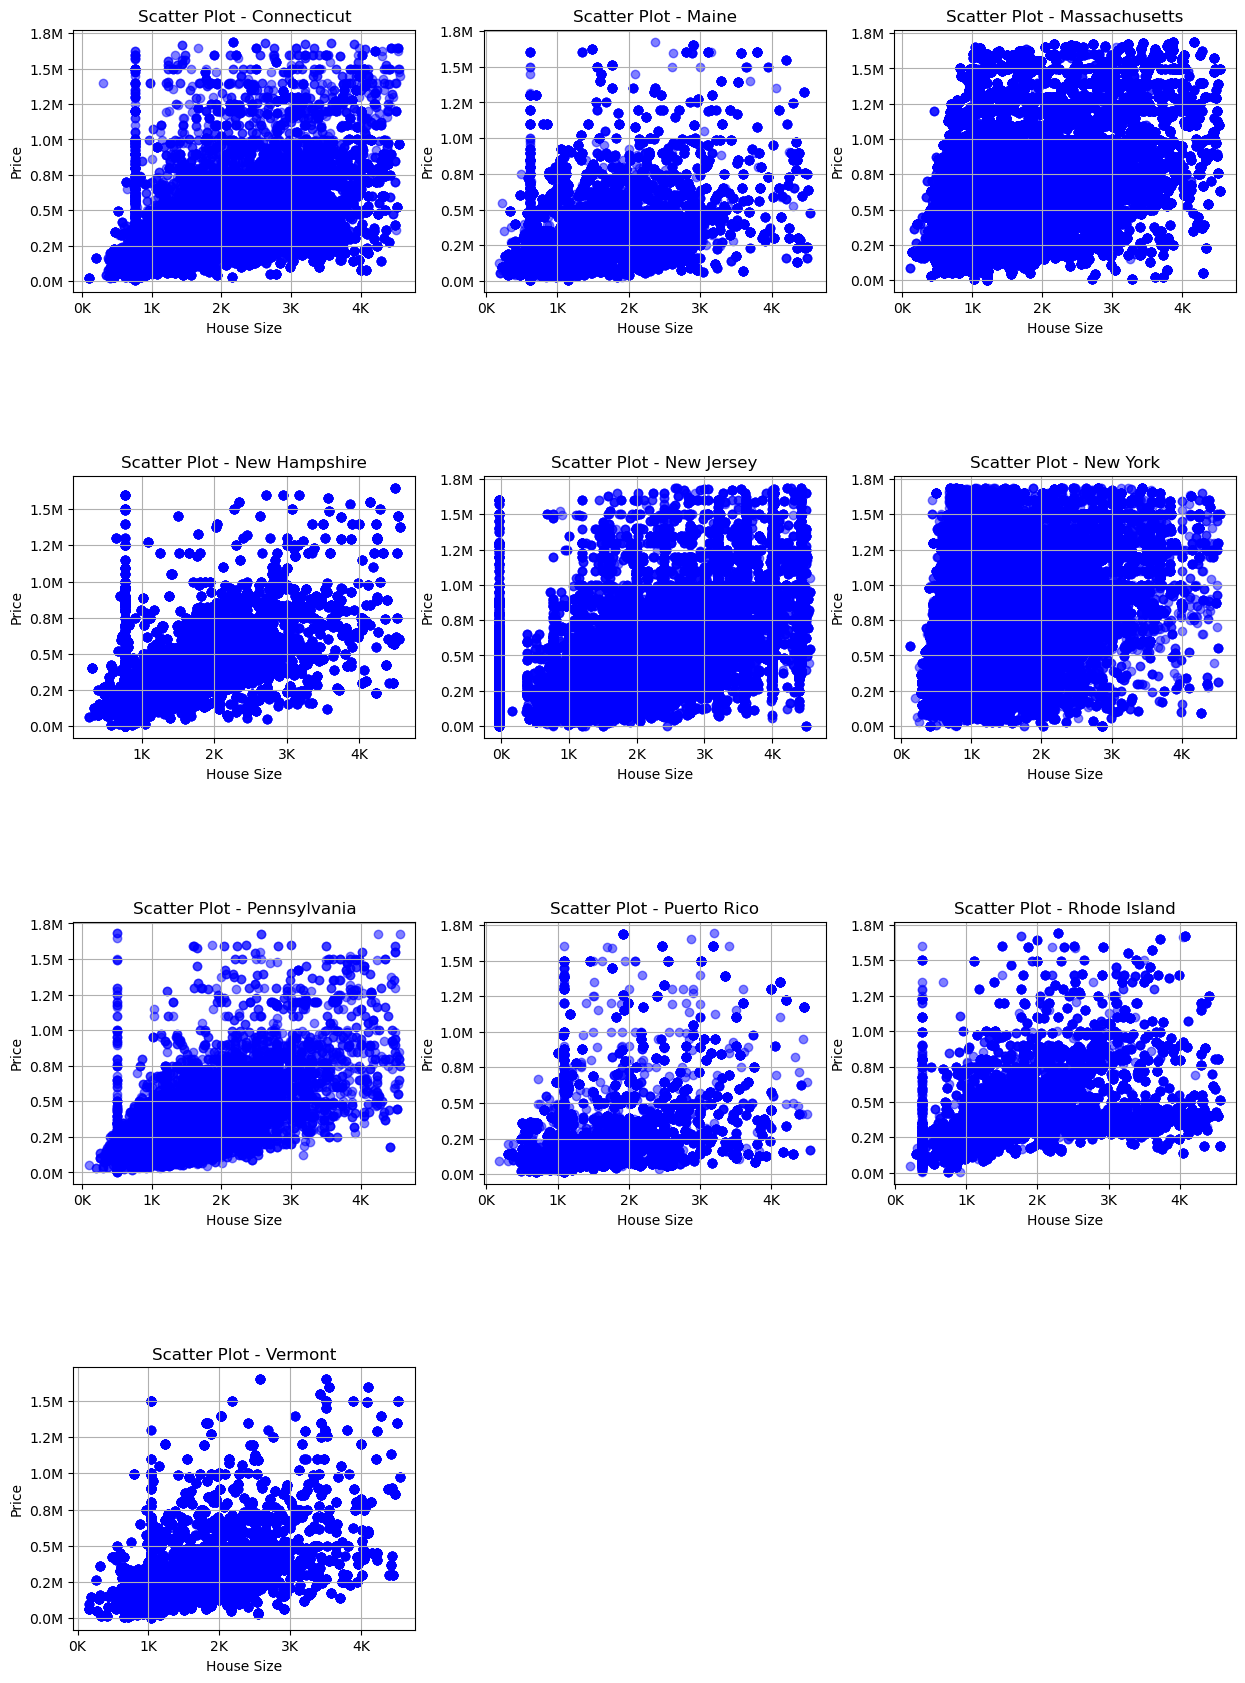

In [18]:
# Calculate the number of rows and columns for the grid layout
num_cols = 3  # Number of scatter plots per row
num_rows = (len(unique_states) + num_cols - 1) // num_cols

# Create a grid of scatter plots for each state
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'price' vs 'house_size' for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = filtered_df[filtered_df['state'] == state]
    
    axes[row, col].scatter(state_df['house_size'], state_df['price'] / 1e6, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('House Size')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    # Format x-axis labels in thousands
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1e3)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(len(unique_states), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

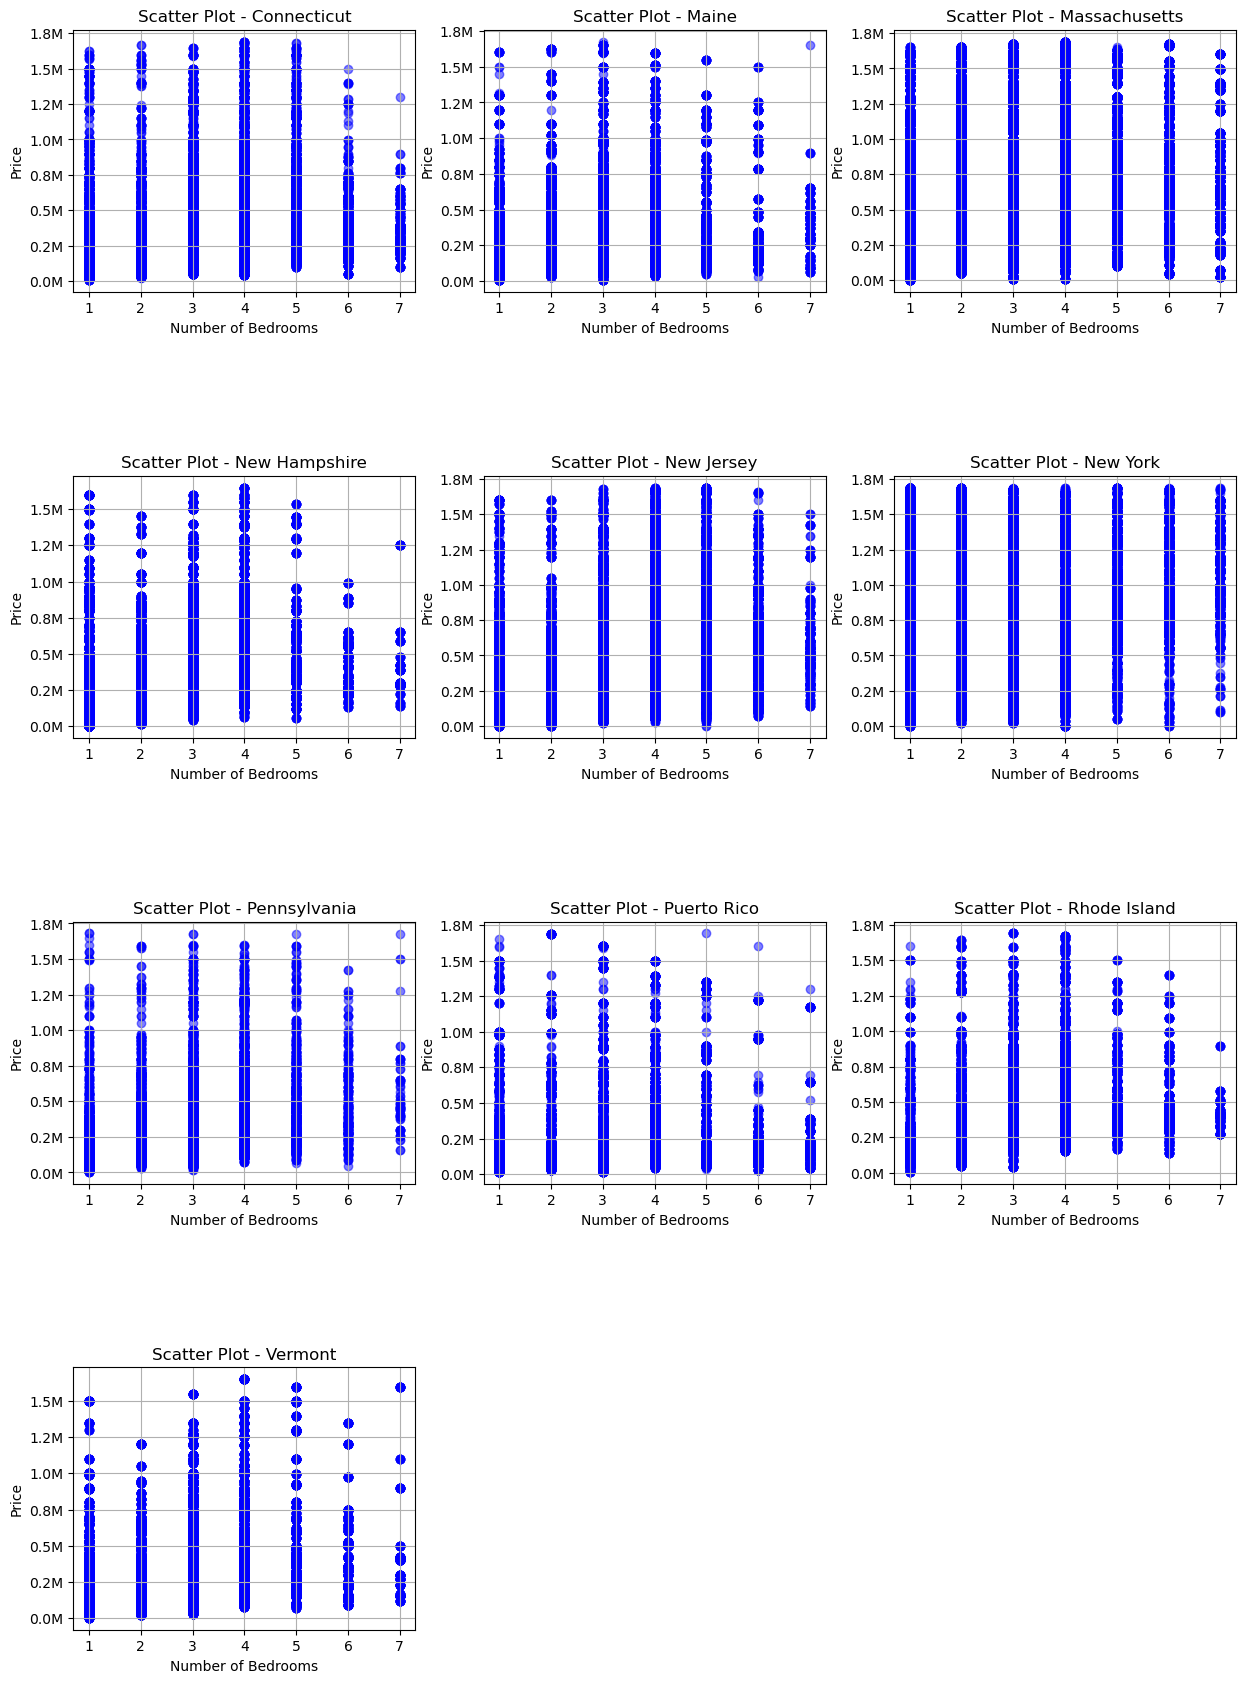

In [19]:
# Create a grid of scatter plots for each state
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'bed' vs 'price' for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = filtered_df[filtered_df['state'] == state]
    
    axes[row, col].scatter(state_df['bed'], state_df['price'] / 1e6, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Number of Bedrooms')
    axes[row, col].set_ylabel('Price')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(len(unique_states), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

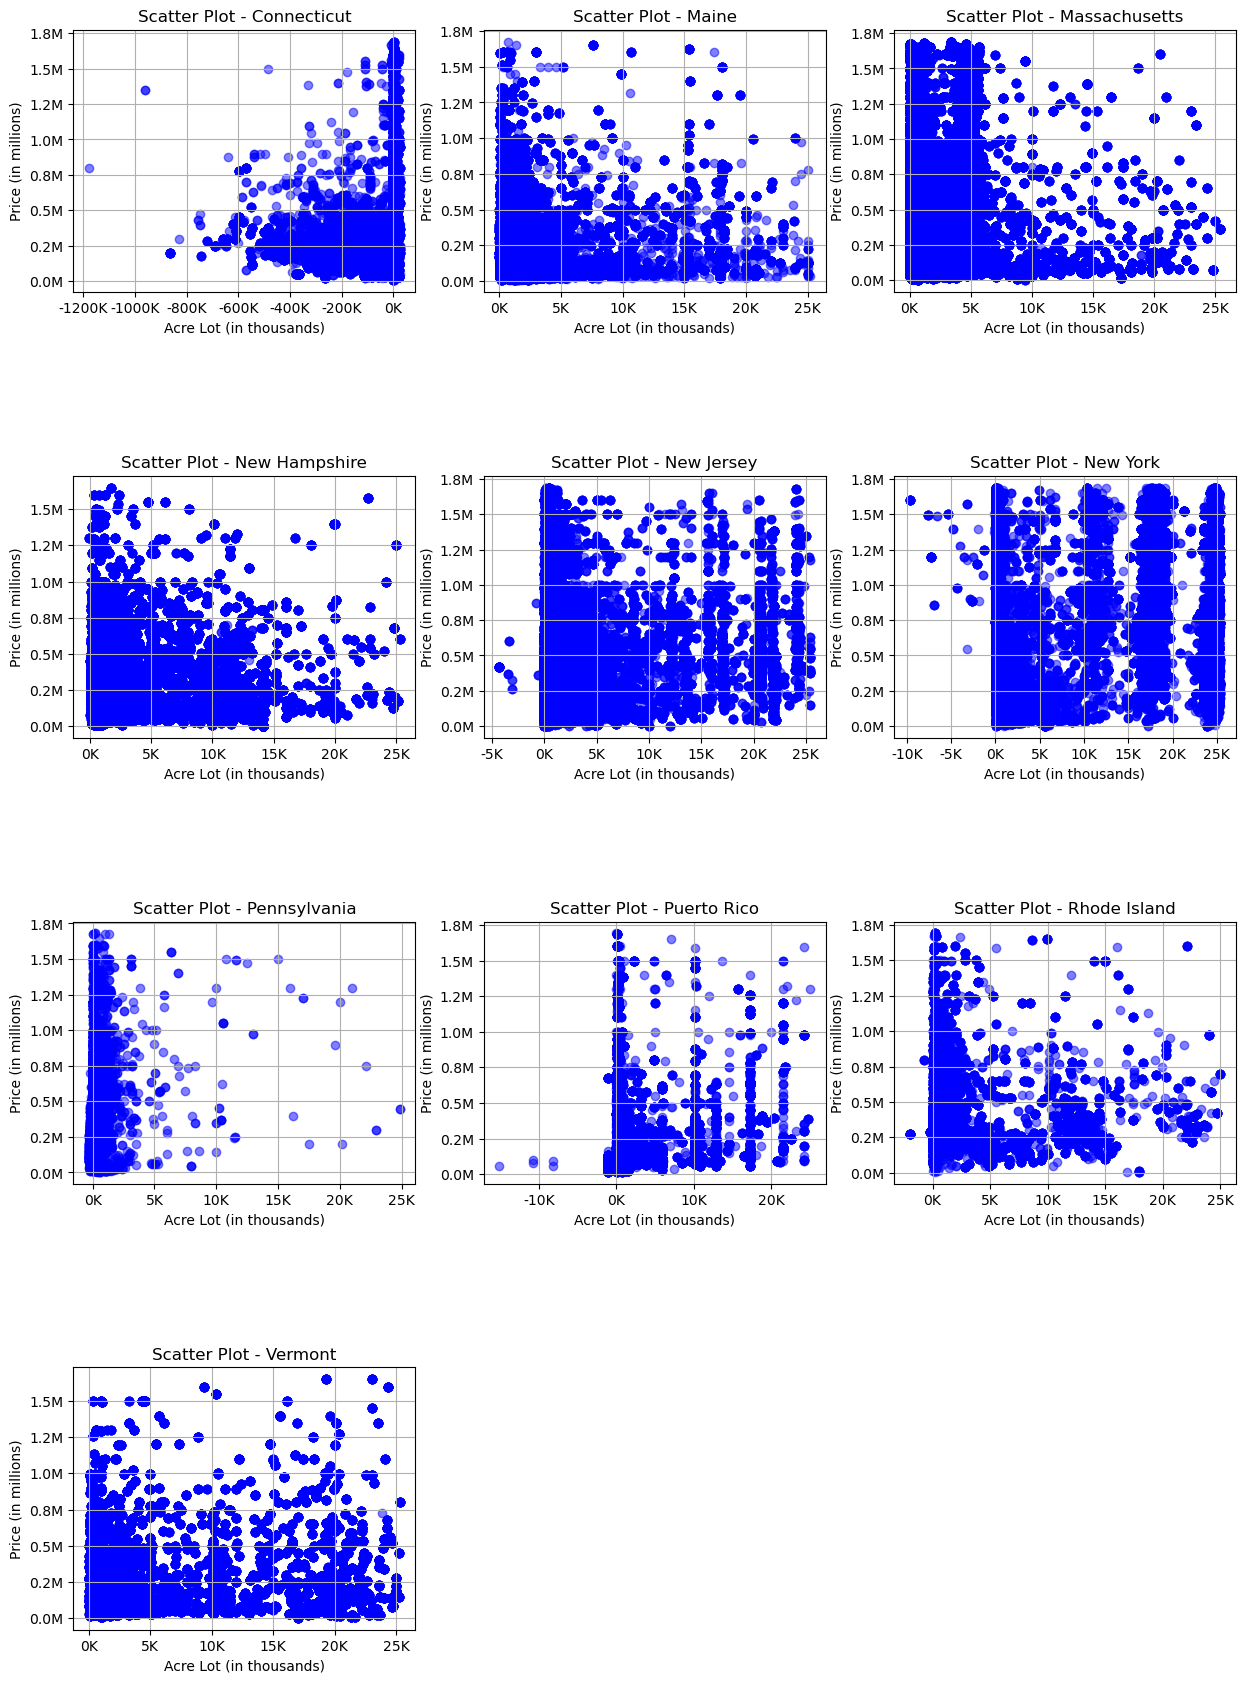

In [20]:
# Create a grid of scatter plots for each state
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
plt.subplots_adjust(hspace=0.7, bottom=0.1, top=0.9)  # Adjust vertical space and figure top/bottom margins

# Create scatter plots for 'acre_lot' vs 'price' for each state and arrange them in a grid
for i, state in enumerate(unique_states):
    row = i // num_cols
    col = i % num_cols
    state_df = filtered_df[filtered_df['state'] == state]
    
    axes[row, col].scatter(state_df['acre_lot'] * 1e3, state_df['price'] / 1e6, color='b', alpha=0.5)
    axes[row, col].set_title(f'Scatter Plot - {state}')
    axes[row, col].set_xlabel('Acre Lot (in thousands)')
    axes[row, col].set_ylabel('Price (in millions)')
    
    # Format y-axis labels in millions with 1 decimal place
    axes[row, col].yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, pos: '{:.1f}M'.format(y)))
    
    # Format x-axis labels in thousands
    axes[row, col].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1e3)))
    
    axes[row, col].grid(True)

# Hide empty subplots if there are any
for i in range(len(unique_states), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

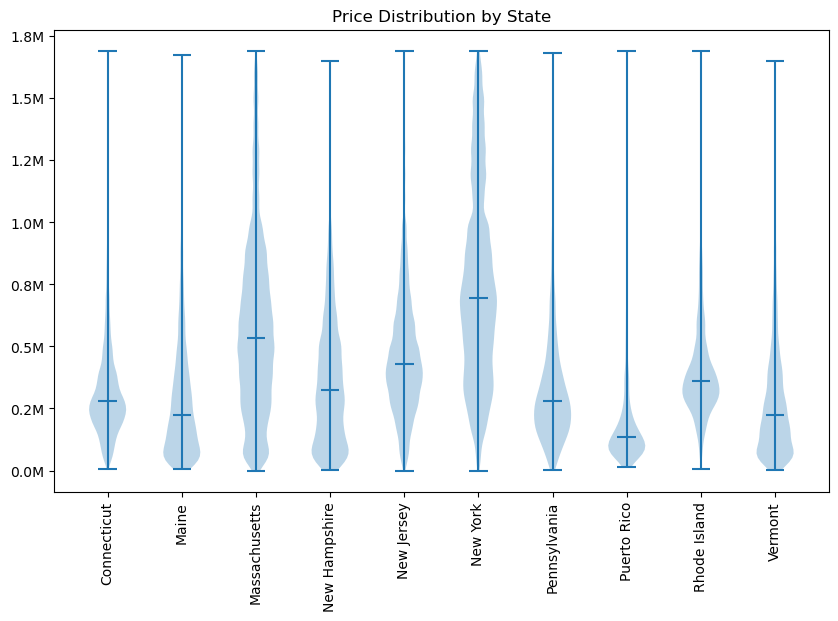

In [21]:
plt.figure(figsize=(10, 6))

# Create a violin plot
violin = plt.violinplot(dataset=[filtered_df[filtered_df['state'] == state]['price'] for state in unique_states],
                        showmedians=True)

# Format y-axis labels in millions with 1 decimal point
formatter = mticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6))
plt.gca().yaxis.set_major_formatter(formatter)

# Set x-axis labels and rotate them vertically
plt.xticks(range(1, len(unique_states) + 1), unique_states, rotation='vertical')

plt.title('Price Distribution by State')
plt.show()

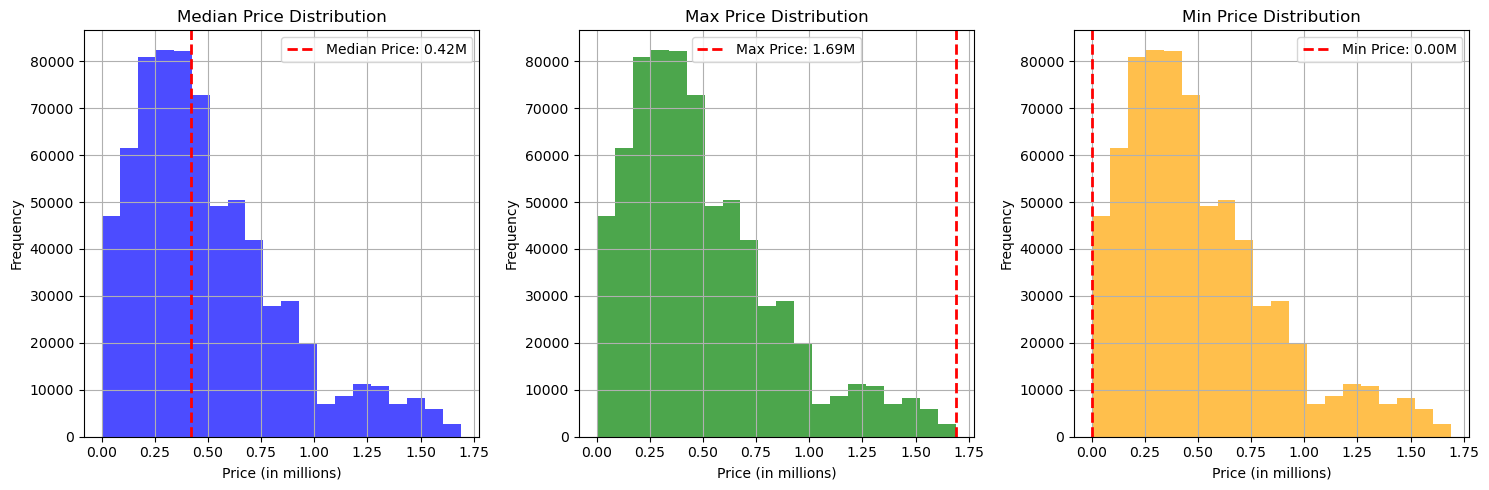

In [22]:
# Calculate statistics
median_price = filtered_df['price'].median()
max_price = filtered_df['price'].max()
min_price = filtered_df['price'].min()

# Create histograms for median price, max price, and min price
plt.figure(figsize=(15, 5))

# Histogram for median price
plt.subplot(1, 3, 1)
plt.hist(filtered_df['price'] / 1e6, bins=20, color='b', alpha=0.7)
plt.axvline(median_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Median Price: {median_price / 1e6:.2f}M')
plt.title('Median Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Histogram for max price
plt.subplot(1, 3, 2)
plt.hist(filtered_df['price'] / 1e6, bins=20, color='g', alpha=0.7)
plt.axvline(max_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Max Price: {max_price / 1e6:.2f}M')
plt.title('Max Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Histogram for min price
plt.subplot(1, 3, 3)
plt.hist(filtered_df['price'] / 1e6, bins=20, color='orange', alpha=0.7)
plt.axvline(min_price / 1e6, color='r', linestyle='dashed', linewidth=2, label=f'Min Price: {min_price / 1e6:.2f}M')
plt.title('Min Price Distribution')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

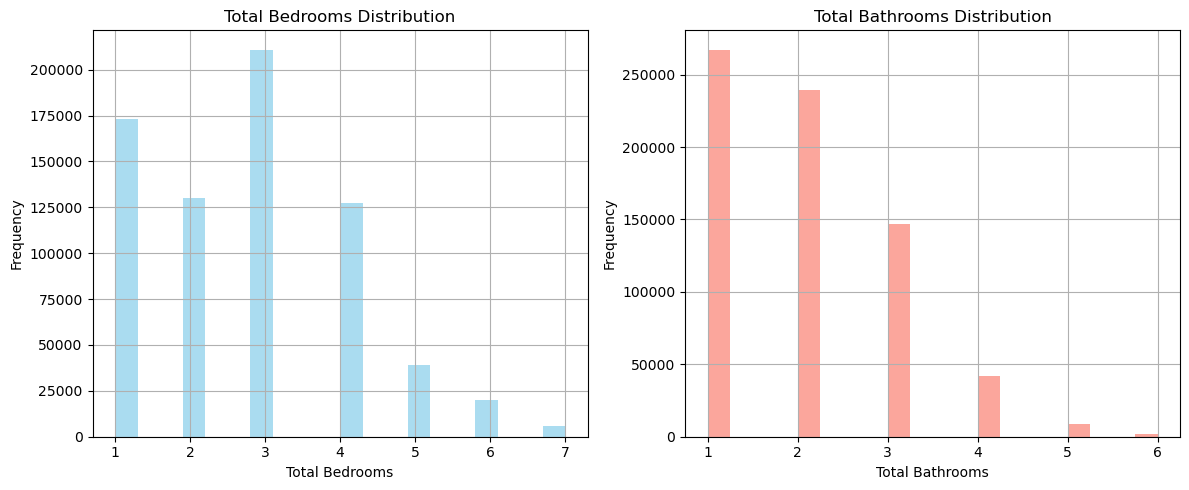

In [23]:
plt.figure(figsize=(12, 5))

# Histogram for total bedrooms
plt.subplot(1, 2, 1)
plt.hist(filtered_df['bed'], bins=20, color='skyblue', alpha=0.7)
plt.title('Total Bedrooms Distribution')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for total bathrooms
plt.subplot(1, 2, 2)
plt.hist(filtered_df['bath'], bins=20, color='salmon', alpha=0.7)
plt.title('Total Bathrooms Distribution')
plt.xlabel('Total Bathrooms')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

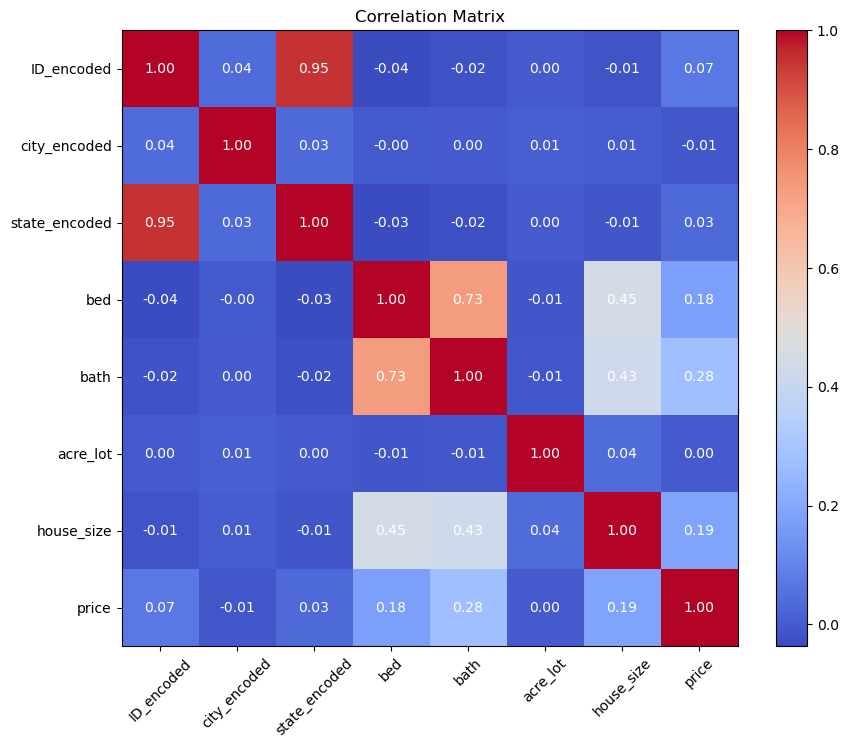

In [24]:
# Initialize LabelEncoders for ID, city, and state columns
label_encoder_id = LabelEncoder()
label_encoder_city = LabelEncoder()
label_encoder_state = LabelEncoder()

# Encode 'ID', 'city', and 'state' columns
combined_df['ID_encoded'] = label_encoder_id.fit_transform(combined_df['ID'])
combined_df['city_encoded'] = label_encoder_city.fit_transform(combined_df['city'])
combined_df['state_encoded'] = label_encoder_state.fit_transform(combined_df['state'])

# Calculate the correlation matrix
correlation_matrix = combined_df[['ID_encoded', 'city_encoded', 'state_encoded', 'bed', 'bath', 'acre_lot', 'house_size', 'price']].corr()

# Plot the correlation matrix using a heatmap with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=45)
plt.yticks(tick_marks, correlation_matrix.columns)

# Display the correlation coefficients in the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

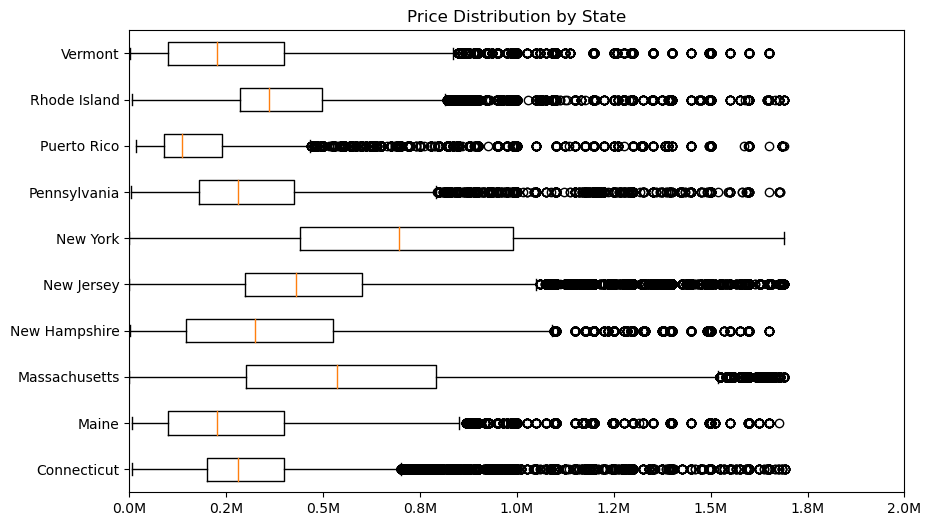

In [25]:
# box plot of price distribution by state
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_df[filtered_df['state'] == state]['price'] / 1e6 for state in unique_states],
            vert=False, labels=unique_states)
plt.title('Price Distribution by State')

# Customize x-axis tick labels to display prices in millions with one decimal place
plt.xticks(ticks=plt.xticks()[0], labels=[f'{tick:.1f}M' for tick in plt.xticks()[0]])

# Set x-axis limits to start from 0
plt.xlim(0)

plt.show()

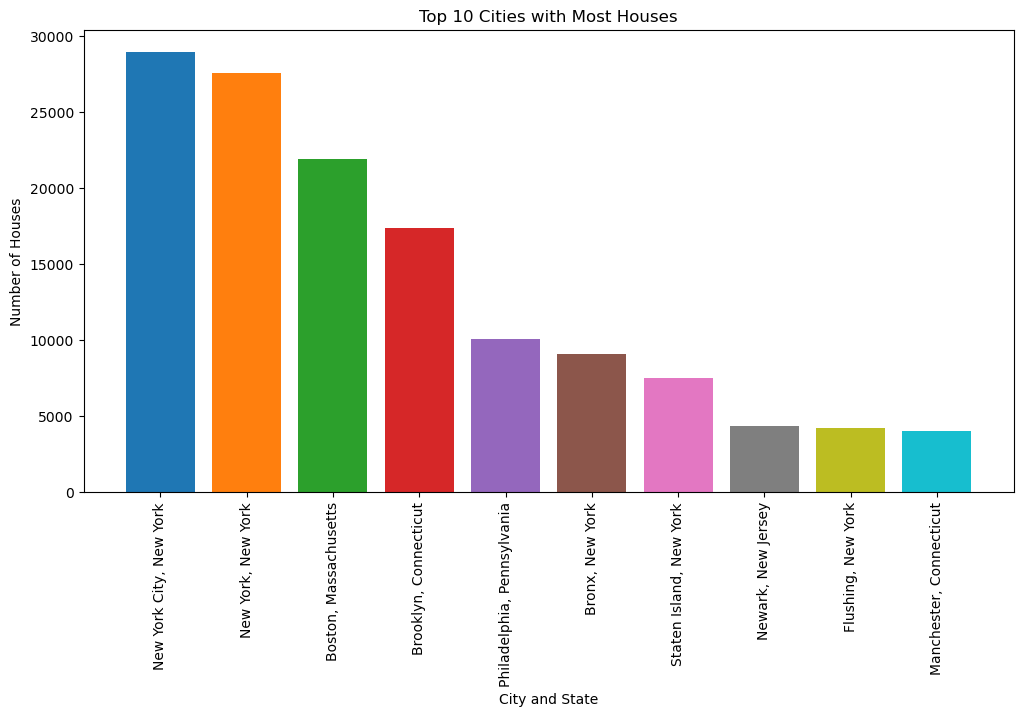

In [26]:
# Get the top 10 cities with the most houses
top_cities = filtered_df['city'].value_counts().nlargest(10)

# Generate unique colors for each bar
colors = plt.cm.tab10(np.arange(len(top_cities)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities)), top_cities.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Number of Houses')
plt.title('Top 10 Cities with Most Houses')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities)), [f"{city}, {filtered_df[filtered_df['city'] == city]['state'].iloc[0]}" for city in top_cities.index], rotation='vertical')

plt.show()

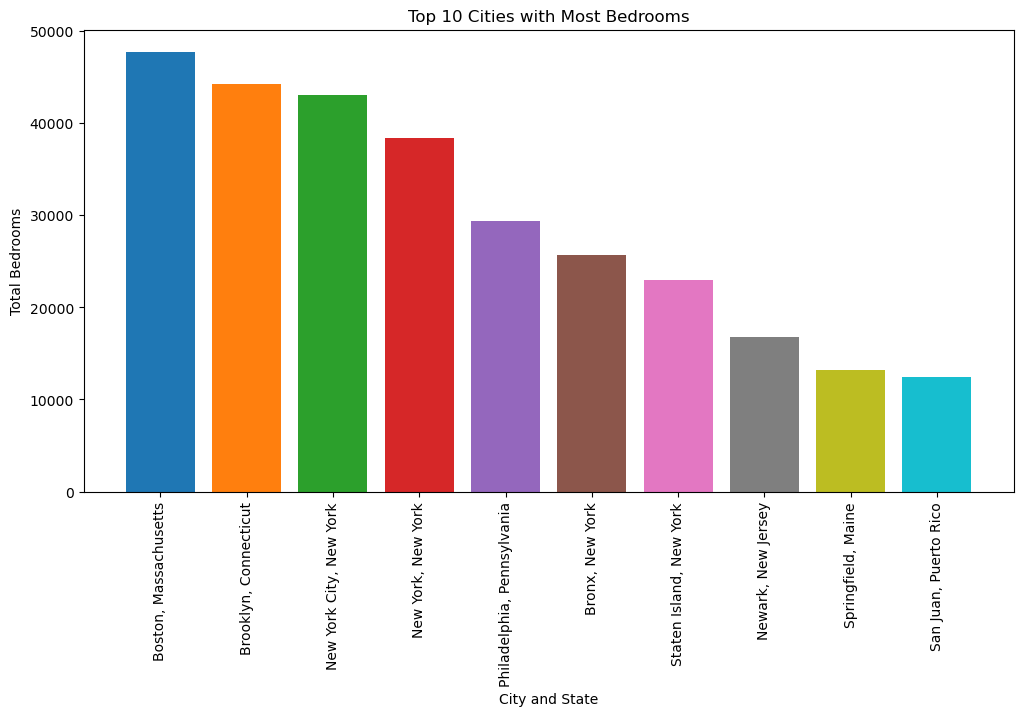

In [27]:
# Get the top 10 cities with the most bedrooms
top_cities_bedrooms = filtered_df.groupby('city')['bed'].sum().nlargest(10)

# Generate unique colors for each bar
colors = plt.cm.tab10(np.arange(len(top_cities_bedrooms)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities_bedrooms)), top_cities_bedrooms.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Total Bedrooms')
plt.title('Top 10 Cities with Most Bedrooms')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities_bedrooms)), [f"{city}, {filtered_df[filtered_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bedrooms.index], rotation='vertical')

plt.show()

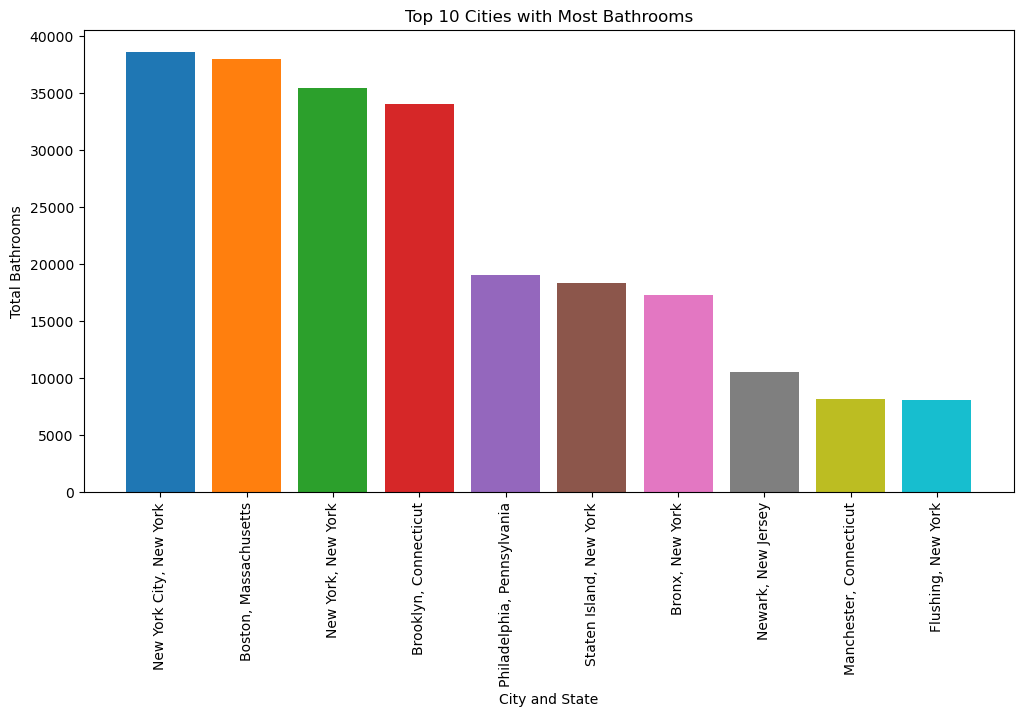

In [28]:
# Get the top 10 cities with the most bathrooms
top_cities_bathrooms = filtered_df.groupby('city')['bath'].sum().nlargest(10)

# Generate unique colors for each bar
colors = plt.cm.tab10(np.arange(len(top_cities_bathrooms)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_cities_bathrooms)), top_cities_bathrooms.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Total Bathrooms')
plt.title('Top 10 Cities with Most Bathrooms')

# Set x-tick labels to city and state names
plt.xticks(range(len(top_cities_bathrooms)), [f"{city}, {filtered_df[filtered_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bathrooms.index], rotation='vertical')

plt.show()

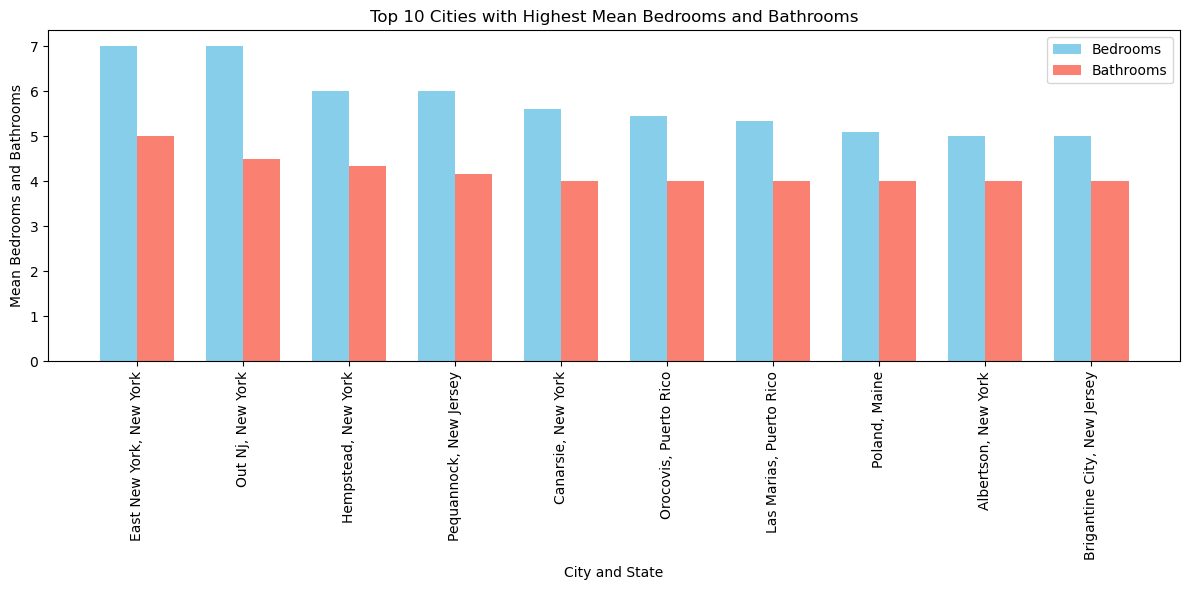

In [29]:
# Calculate the mean number of bedrooms and bathrooms for each city
city_bed_bath_mean = filtered_df.groupby('city')[['bed', 'bath']].mean()

# Calculate the mean of bed and bath and sort by descending order, then select the top 10 cities
top_cities_bed_mean = city_bed_bath_mean['bed'].nlargest(10)
top_cities_bath_mean = city_bed_bath_mean['bath'].nlargest(10)

# Generate unique colors for bedrooms and bathrooms
bedroom_color = 'skyblue'
bathroom_color = 'salmon'

# Plot separate bars for mean bedrooms and bathrooms for each city
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(top_cities_bed_mean))

plt.bar(indices, top_cities_bed_mean.values, bar_width, color=bedroom_color, label='Bedrooms')
plt.bar(indices + bar_width, top_cities_bath_mean.values, bar_width, color=bathroom_color, label='Bathrooms')

plt.xlabel('City and State')
plt.ylabel('Mean Bedrooms and Bathrooms')
plt.title('Top 10 Cities with Highest Mean Bedrooms and Bathrooms')
plt.xticks(indices + bar_width / 2, [f"{city}, {filtered_df[filtered_df['city'] == city]['state'].iloc[0]}" for city in top_cities_bed_mean.index], rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()

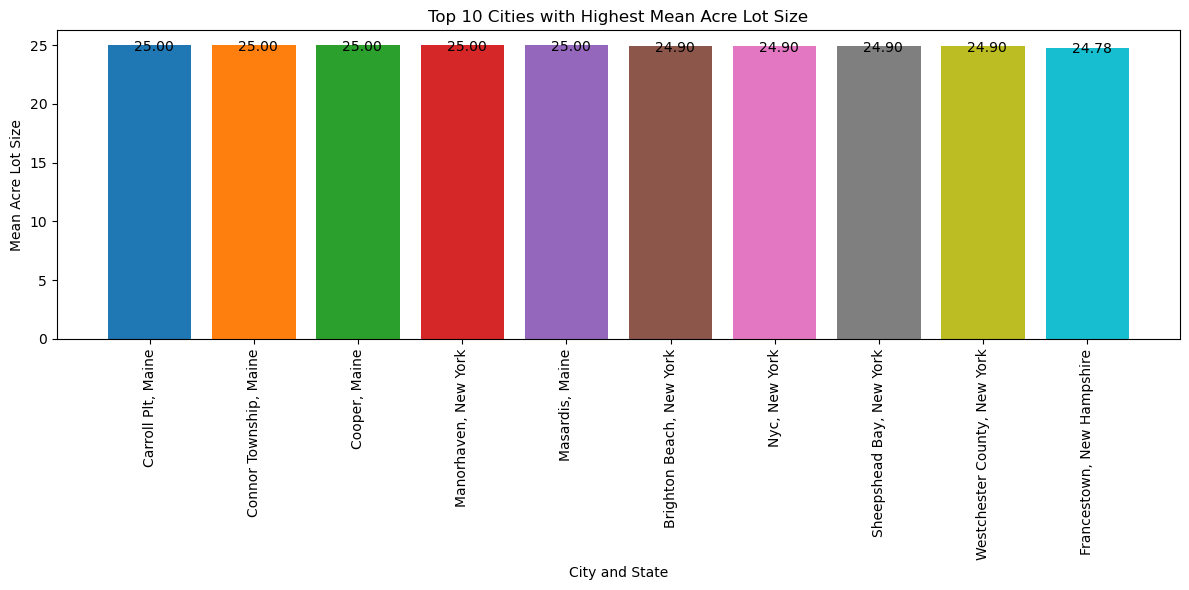

In [30]:
# Get the top 10 cities with highest mean acre lot size
top_cities_acre_lot_mean = filtered_df.groupby(['city', 'state'])['acre_lot'].mean().nlargest(10)

# Extract city and state names for labeling
city_states = [f"{city}, {state}" for city, state in top_cities_acre_lot_mean.index]

# Plot bar chart for mean acre lot size for each city with city and state labels and values inside the bars
plt.figure(figsize=(12, 6))
bars = plt.bar(city_states, top_cities_acre_lot_mean.values, color=colors)

# Add labels and title
plt.xlabel('City and State')
plt.ylabel('Mean Acre Lot Size')
plt.title('Top 10 Cities with Highest Mean Acre Lot Size')

# Add values inside the bars
for bar, value in zip(bars, top_cities_acre_lot_mean.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.5, f'{value:.2f}', fontsize=10)

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

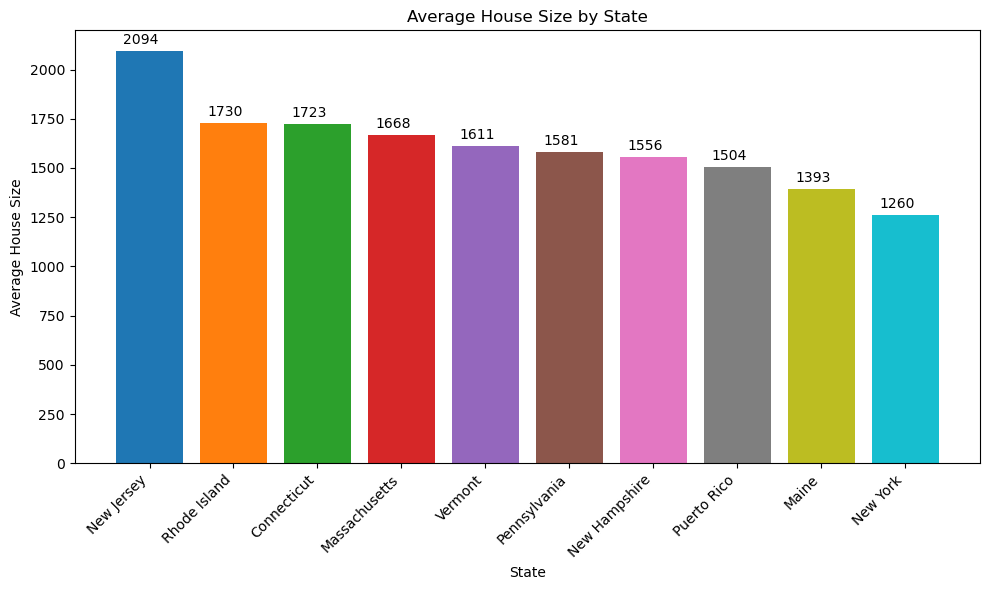

In [31]:
# Calculate average house size by state
avg_house_size_by_state = filtered_df.groupby('state')['house_size'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_house_size_by_state.index, avg_house_size_by_state.values, color=colors)
plt.xlabel('State')
plt.ylabel('Average House Size')
plt.title('Average House Size by State')

# Add text annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 20, str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

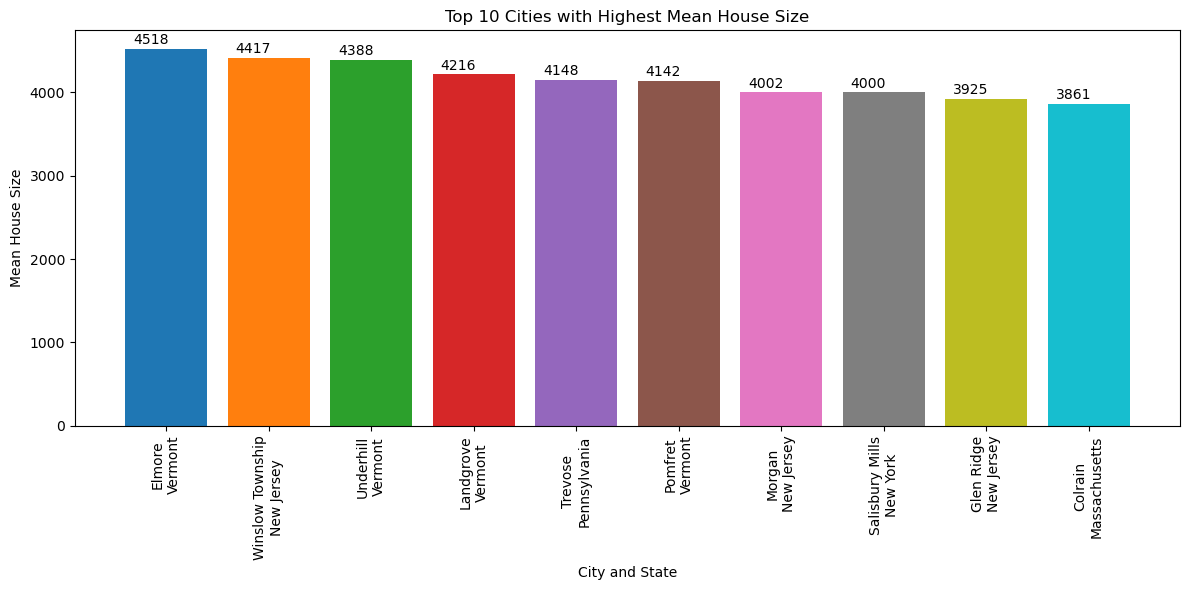

In [32]:
# Group by city and state, calculate mean house size, and sort by mean size
city_state_mean_size = filtered_df.groupby(['city', 'state'])['house_size'].mean().sort_values(ascending=False)

# Select top 10 cities with highest mean house size
top_cities = city_state_mean_size.head(10)

# Plotting the bar chart with text annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(top_cities.index.map(lambda x: f"{x[0]}\n{x[1]}"), top_cities.values, color=colors)
plt.xlabel('City and State')
plt.ylabel('Mean House Size')
plt.title('Top 10 Cities with Highest Mean House Size')
plt.xticks(rotation=90, ha='center')

# Add text annotations on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

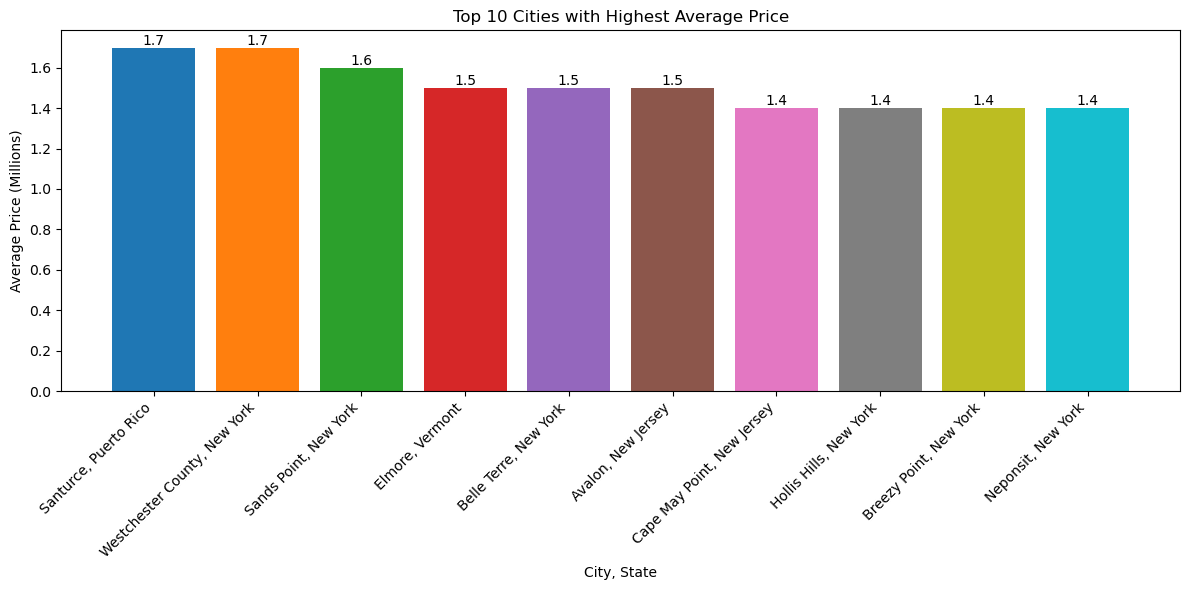

In [33]:
# Calculate average price for each city
city_avg_price = filtered_df.groupby(['city', 'state'])['price'].mean()

# Get top 10 cities with highest average price
top_10_cities = city_avg_price.nlargest(10)

# Convert average price to millions with 1 decimal point
top_10_cities_in_millions = (top_10_cities / 1e6).round(1)

# Extract city and state names for x-axis labels
x_labels = [f'{city}, {state}' for city, state in top_10_cities_in_millions.index]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, top_10_cities_in_millions.values, color=colors)

# Adding data values on top of the bars
for bar, label in zip(bars, top_10_cities_in_millions.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(label), ha='center', va='bottom')

plt.xlabel('City, State')
plt.ylabel('Average Price (Millions)')
plt.title('Top 10 Cities with Highest Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


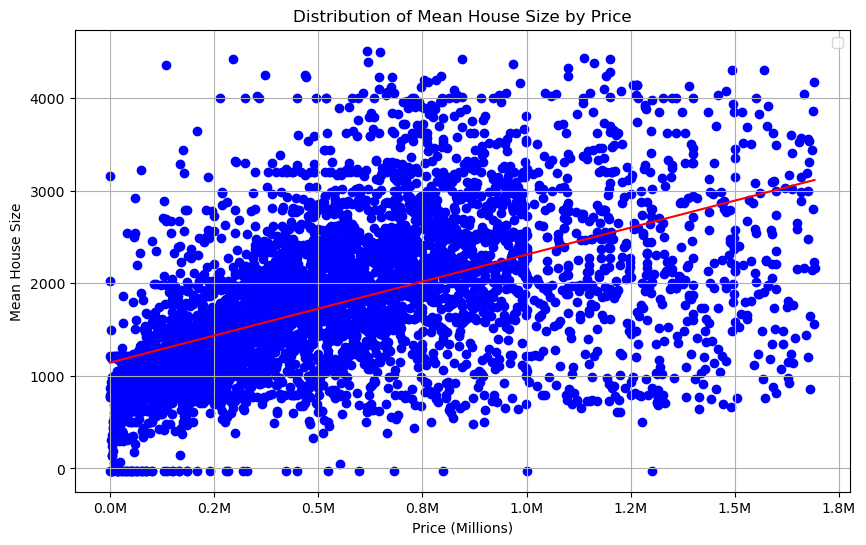

In [34]:

# Calculate mean house size for each price
price_mean_house_size = filtered_df.groupby('price')['house_size'].mean().reset_index()

# Fit a linear regression line using NumPy polyfit
coefficients = np.polyfit(price_mean_house_size['price'], price_mean_house_size['house_size'], 1)
polynomial = np.poly1d(coefficients)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(price_mean_house_size['price'], price_mean_house_size['house_size'], color='b')
plt.plot(price_mean_house_size['price'], polynomial(price_mean_house_size['price']), color='r')

# Format x-axis labels in millions with 1 decimal point
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Distribution of Mean House Size by Price')
plt.xlabel('Price (Millions)')
plt.ylabel('Mean House Size')
plt.legend()
plt.grid(True)
plt.show()

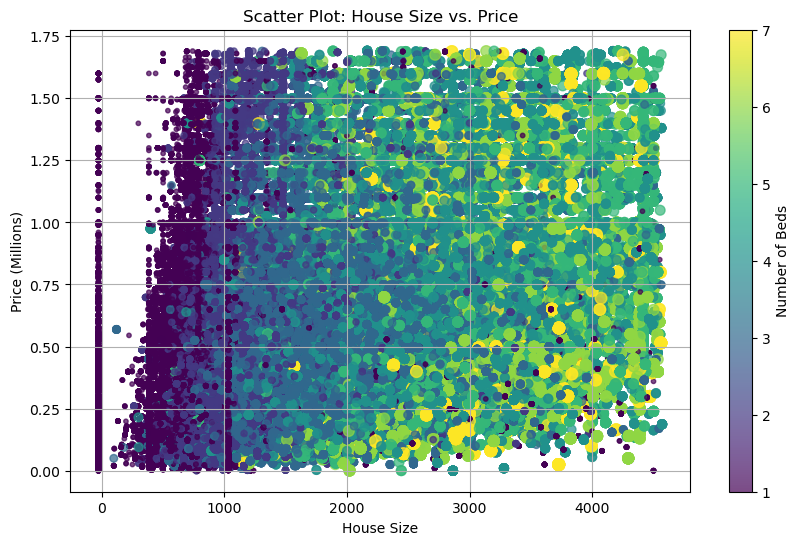

In [35]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Define colors and sizes based on the number of beds
colors = filtered_df['bed']
sizes = filtered_df['bed'] * 10  # Adjust the scale for bubble size

# Scatter plot with bubble size and color representing the number of beds
plt.scatter(filtered_df['house_size'], filtered_df['price'] / 1e6, 
            c=colors, cmap='viridis', s=sizes, alpha=0.7)

# Set x and y labels
plt.xlabel('House Size')
plt.ylabel('Price (Millions)')
plt.colorbar(label='Number of Beds')  # Add colorbar for bed count

# Add title and grid
plt.title('Scatter Plot: House Size vs. Price')
plt.grid(True)

# Show the plot
plt.show()

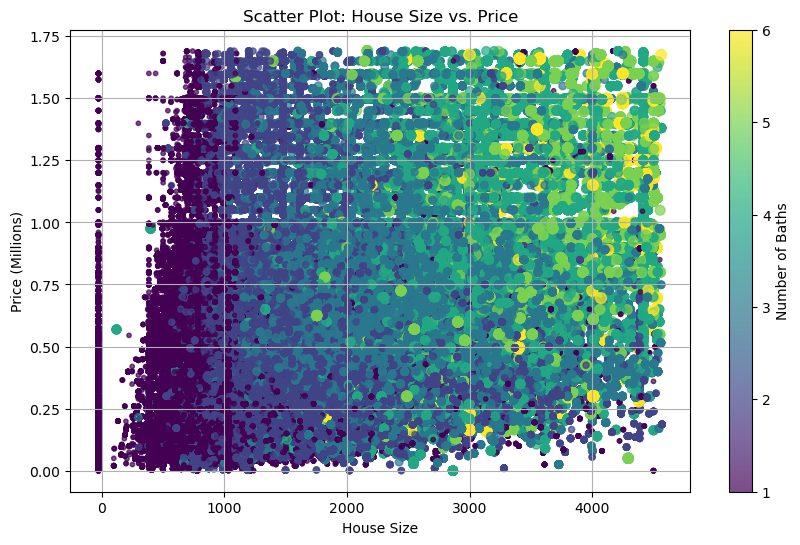

In [36]:
# Define the figure size
plt.figure(figsize=(10, 6))

# Define colors and sizes based on the number of baths
colors = filtered_df['bath']
sizes = filtered_df['bath'] * 10  # Adjust the scale for bubble size

# Scatter plot with bubble size and color representing the number of baths
plt.scatter(filtered_df['house_size'], filtered_df['price'] / 1e6, 
            c=colors, cmap='viridis', s=sizes, alpha=0.7)

# Set x and y labels
plt.xlabel('House Size')
plt.ylabel('Price (Millions)')
plt.colorbar(label='Number of Baths')  # Add colorbar for bath count

# Add title and grid
plt.title('Scatter Plot: House Size vs. Price')
plt.grid(True)

# Show the plot
plt.show()